Importing libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
import pandas as pd
from scipy.stats import skew, kurtosis
import seaborn as sns
from scipy.stats import zscore
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC






Loading data

In [3]:
train_data = np.load('train.npz')
X_train = train_data['x_train']
y_train = train_data['y_train']

Inspecting the shape of the data

In [48]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_train dtype: {X_train.dtype}")
print(f"y_train dtype: {y_train.dtype}")


X_train shape: (56000, 784)
y_train shape: (56000,)
X_train dtype: float64
y_train dtype: uint8


Missing values

In [122]:
missing_values_count = np.sum(np.isnan(X_train))
print(f"Number of missing values in X_train: {missing_values_count}")

Number of missing values in X_train: 0


Class distribution

In [57]:
classes = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]


Class distribution:
T-shirt/top: 5606 samples
Trouser: 5598 samples
Pullover: 5593 samples
Dress: 5551 samples
Coat: 5643 samples
Sandal: 5551 samples
Shirt: 5593 samples
Sneaker: 5641 samples
Bag: 5658 samples
Ankle boot: 5566 samples


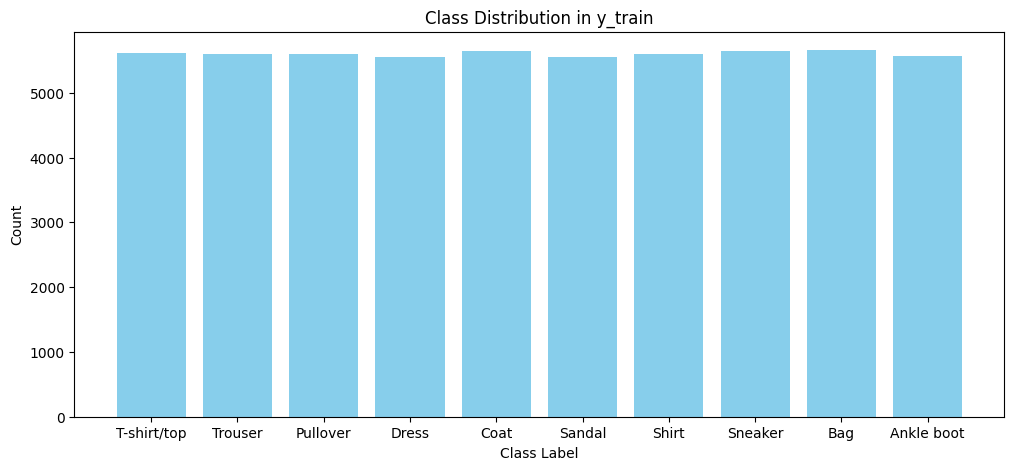

In [59]:
unique_classes, counts = np.unique(y_train, return_counts=True)
print("Class distribution:")
for label, count in zip(unique_classes, counts):
    print(f"{classes[label]}: {count} samples")

# Bar plot for class distribution
plt.bar(classes, counts, color='skyblue')
plt.xlabel("Class Label")
plt.ylabel("Count")
plt.title("Class Distribution in y_train")
plt.xticks(unique_classes)
plt.show()

Visualize data

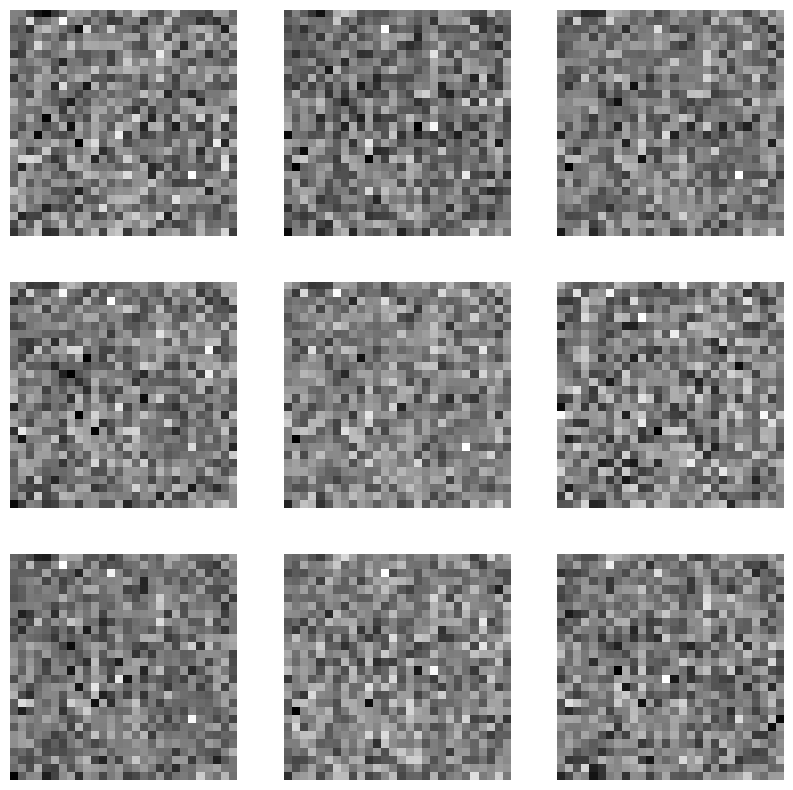

In [47]:
images = X_train.reshape(-1, 28, 28)


plt.figure(figsize=(10, 10))
for i in range(9): 
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.axis('off')
plt.show()


# Compute and visualize descriptive statistics for features in X_train:

Mean, Standard Deviation, Min and Max

In [ ]:
mean_features = np.mean(X_train, axis=0)
std_features = np.std(X_train, axis=0)
min_features = np.min(X_train, axis=0)
max_features = np.max(X_train, axis=0)

feature_stats = pd.DataFrame({
    'mean': mean_features,
    'std': std_features,
    'min': min_features,
    'max': max_features
})


print(f"Mean of features: {mean_features[:5]}")  # Display first 5
print(f"Std of features: {std_features[:5]}")  
print(f"Min of features: {min_features[:5]}")
print(f"Max of features: {max_features[:5]}")

Mean of features: [  795.69442925   139.5414616  -2392.55789165 -4962.38332838
 -5011.35317127]
Std of features: [1553.68024912 1341.52872546 1915.2091937  2998.49614325 3142.25483307]
Min of features: [ -6769.96228231  -7444.48721508 -10620.17298062 -14874.32802229
 -18270.67196794]
Max of features: [7309.81602093 6349.45583428 4639.48354486 4137.26200713 2572.73073115]


In [96]:
print(feature_stats.head())

          mean          std           min          max
0   795.694429  1553.680249  -6769.962282  7309.816021
1   139.541462  1341.528725  -7444.487215  6349.455834
2 -2392.557892  1915.209194 -10620.172981  4639.483545
3 -4962.383328  2998.496143 -14874.328022  4137.262007
4 -5011.353171  3142.254833 -18270.671968  2572.730731


Skew and kurtosis

In [111]:
skewness = skew(X_train, axis=0)
kurt = kurtosis(X_train, axis=0)

# Add skewness and kurtosis to the feature stats DataFrame
feature_stats['skewness'] = skewness
feature_stats['kurtosis'] = kurt

In [112]:
print("Feature statistics (mean, std, min, max, skewness, kurtosis):")
print(feature_stats.head())

Feature statistics (mean, std, min, max, skewness, kurtosis):
          mean          std           min          max  skewness  kurtosis
0   795.694429  1553.680249  -6769.962282  7309.816021  0.117891 -0.069470
1   139.541462  1341.528725  -7444.487215  6349.455834 -0.287289  1.008527
2 -2392.557892  1915.209194 -10620.172981  4639.483545 -0.236146 -0.269665
3 -4962.383328  2998.496143 -14874.328022  4137.262007 -0.088378 -0.646502
4 -5011.353171  3142.254833 -18270.671968  2572.730731 -0.347854 -0.566015


Mean of Features

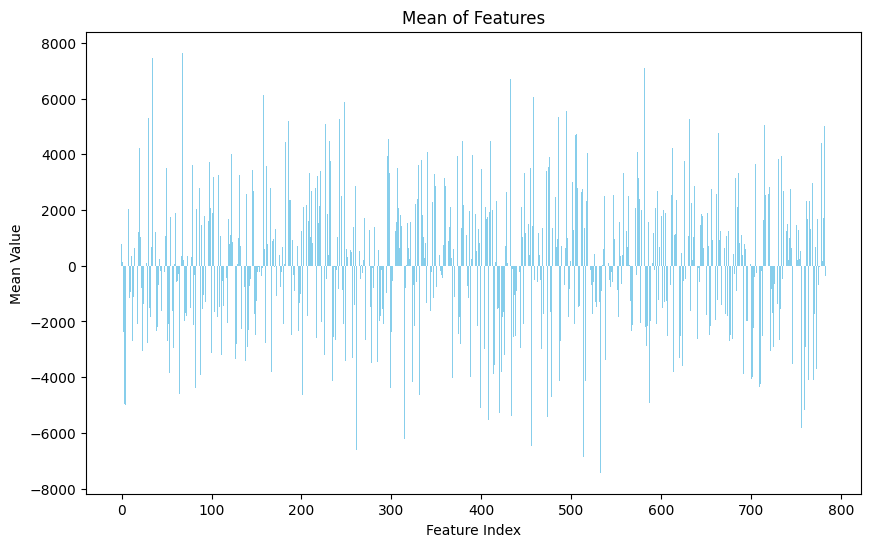

In [72]:
plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), mean_features, color='skyblue')
plt.title('Mean of Features')
plt.xlabel('Feature Index')
plt.ylabel('Mean Value')
plt.show()

Standard Deviation of Features

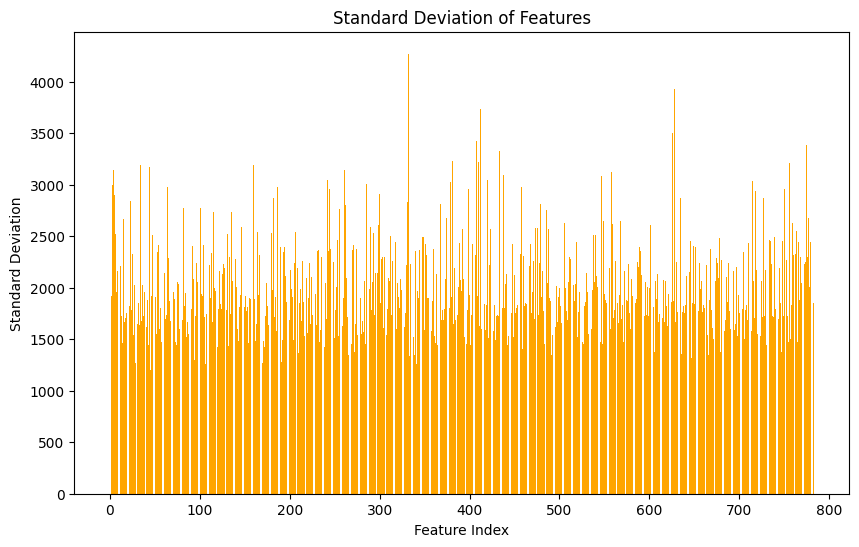

In [73]:
plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), std_features, color='orange')
plt.title('Standard Deviation of Features')
plt.xlabel('Feature Index')
plt.ylabel('Standard Deviation')
plt.show()

Skewness of Features

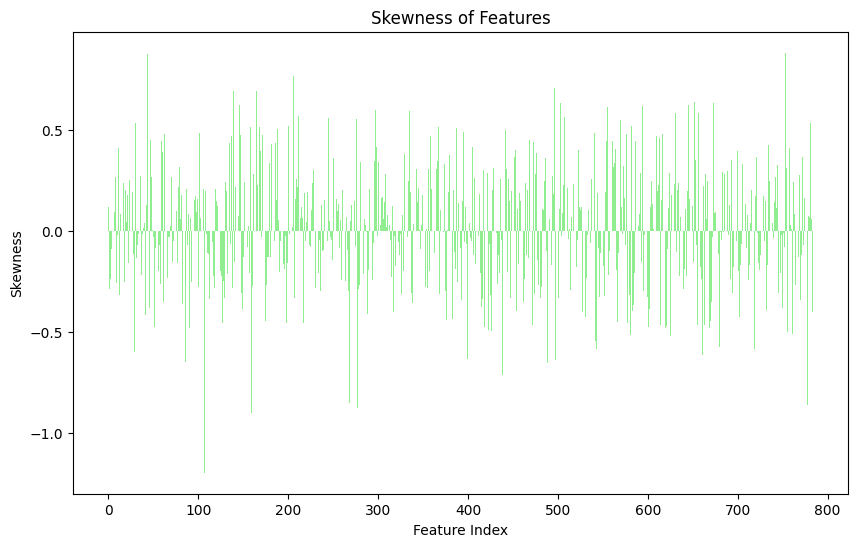

In [74]:
plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), skewness, color='lightgreen')
plt.title('Skewness of Features')
plt.xlabel('Feature Index')
plt.ylabel('Skewness')
plt.show()

Kurtosis of Features

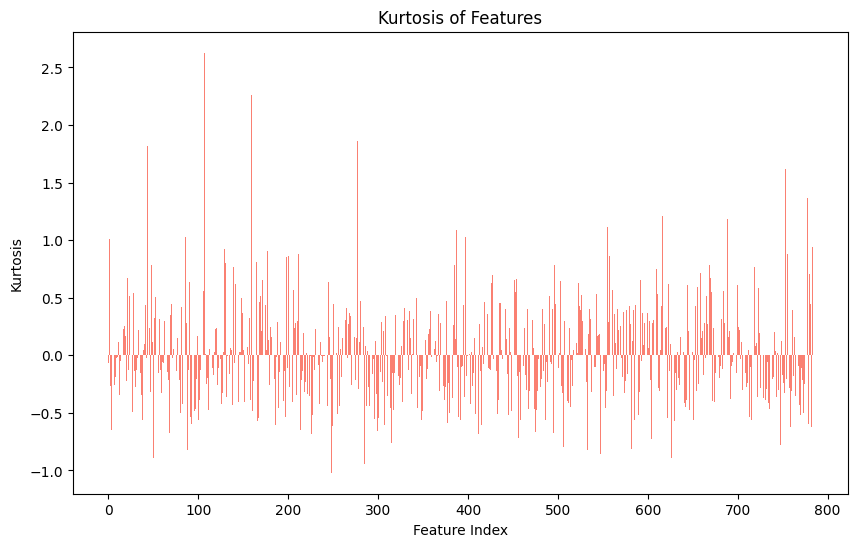

In [75]:
plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), kurt, color='salmon')
plt.title('Kurtosis of Features')
plt.xlabel('Feature Index')
plt.ylabel('Kurtosis')
plt.show()

Value Ranges of Features

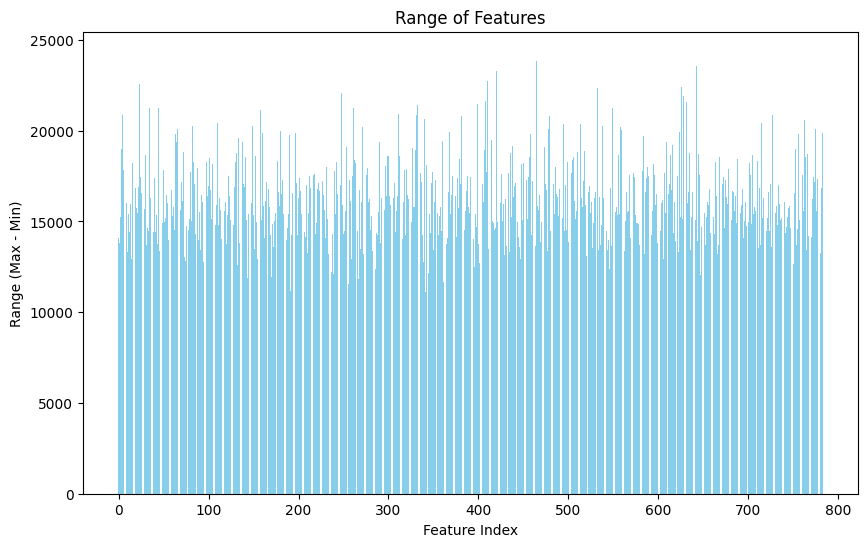

In [101]:
# Calculating the range (max - min) for each feature
feature_range = X_train.max(axis=0) - X_train.min(axis=0)

# Plotting the range of features
plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), feature_range, color='skyblue')
plt.title('Range of Features')
plt.xlabel('Feature Index')
plt.ylabel('Range (Max - Min)')
plt.show()


# PCA (Principal Component Analysis)

Standardization

In [113]:
from sklearn.preprocessing import StandardScaler

# Standardization: We transform the data so the mean will be 0 and standard deviation 1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

We check that the mean is 0 and standard deviation is 1

In [115]:
mean_features_pca = np.mean(X_scaled, axis=0)
std_features_pca = np.std(X_scaled, axis=0)
print(f"Mean of features: {mean_features_pca[:5]}")  # Display first 5
print(f"Std of features: {std_features_pca[:5]}")  


Mean of features: [ 3.42285327e-15  7.15209638e-16 -9.02624007e-15  9.00450746e-15
 -1.18870509e-14]
Std of features: [1. 1. 1. 1. 1.]


2D PCA

In [116]:
pca = PCA(n_components=2)  # First 2 principal components
X_pca = pca.fit_transform(X_scaled)

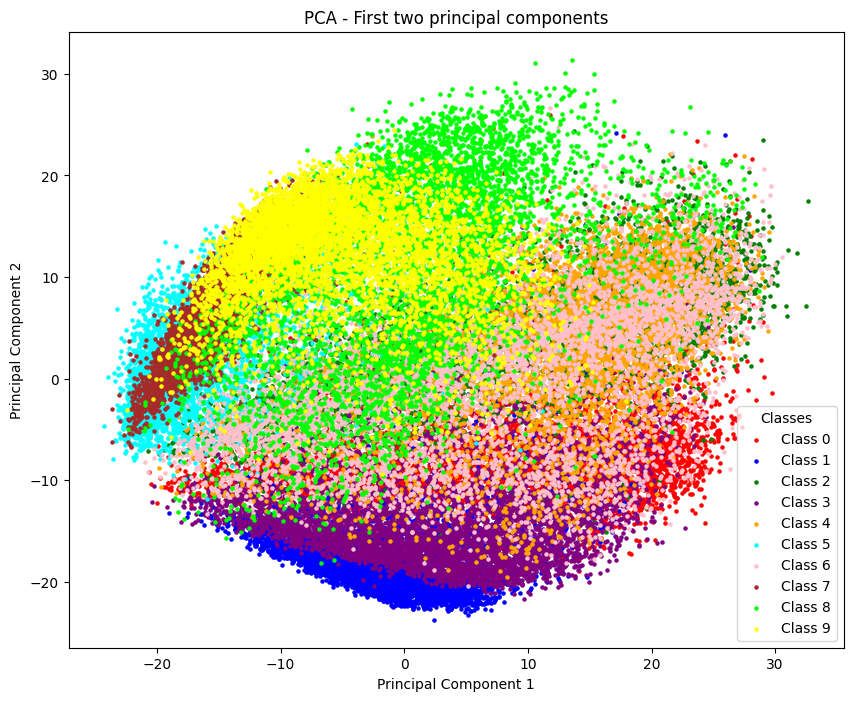

In [117]:
# Visualizing the PCA results in 2D with distinct colors for each class
plt.figure(figsize=(10, 8))

# Define a list of distinct colors
colors = ['red', 'blue', 'green', 'purple', 'orange', 'cyan', 'pink', 'brown', 'lime', 'yellow']

# Scatter plot in 2D with distinct colors for each class
for i in range(10):  # 10 classes
    plt.scatter(X_pca[y_train == i, 0], X_pca[y_train == i, 1],
                color=colors[i], label=f'Class {i}', s=5)

plt.title('PCA - First two principal components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Adding a legend
plt.legend(title="Classes")

plt.show()


3D PCA

In [119]:
pca = PCA(n_components=3)  # First 3 principal components
X_pca = pca.fit_transform(X_scaled)

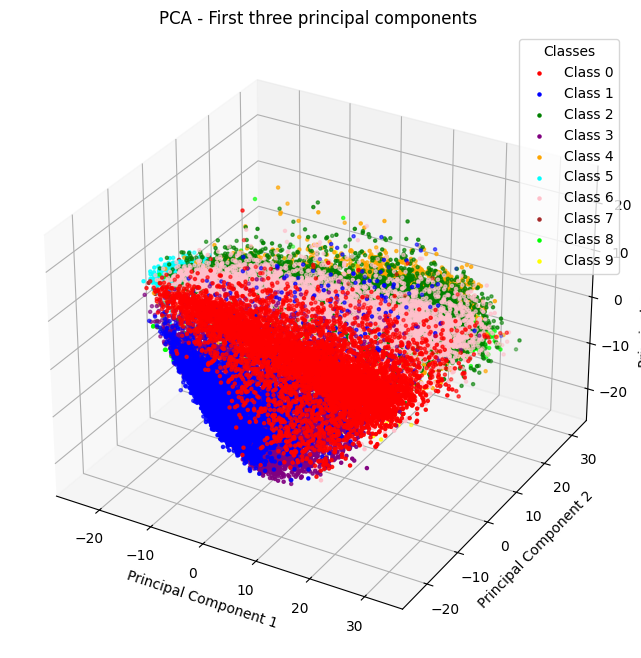

In [120]:

# Visualizing the PCA results in 3D with distinct colors for each class
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Define a list of distinct colors
colors = ['red', 'blue', 'green', 'purple', 'orange', 'cyan', 'pink', 'brown', 'lime', 'yellow']

# Scatter plot in 3D with distinct colors for each class
for i in range(10):  # 10 classes
    ax.scatter(X_pca[y_train == i, 0], X_pca[y_train == i, 1], X_pca[y_train == i, 2],
               color=colors[i], label=f'Class {i}', s=5)

ax.set_title('PCA - First three principal components')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

# Adding a legend
ax.legend(title="Classes")

plt.show()


# Visualize Feature Distributions

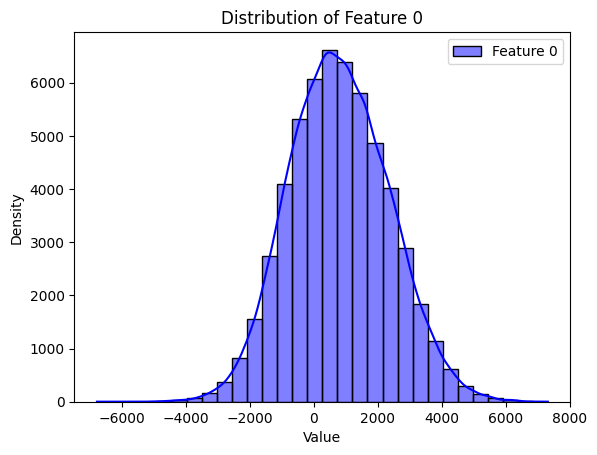

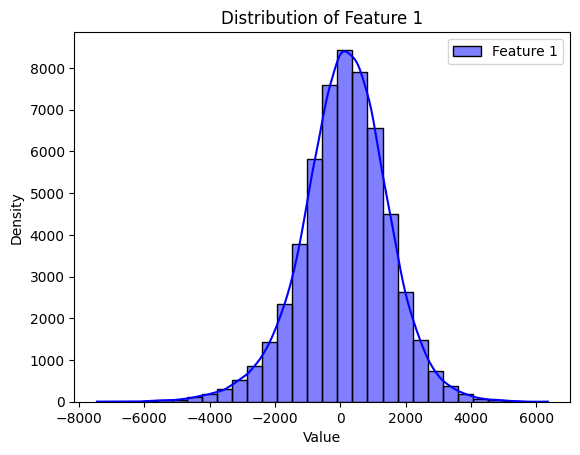

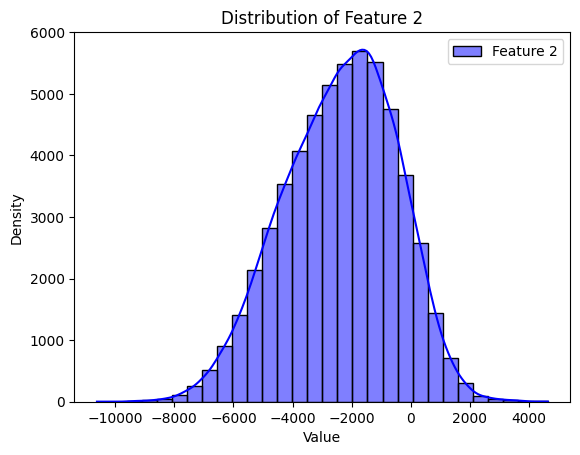

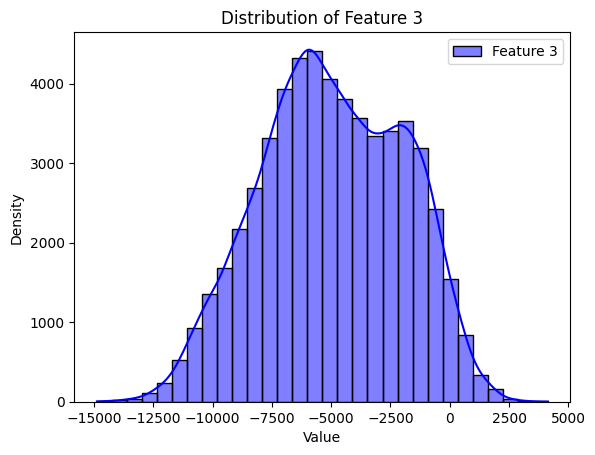

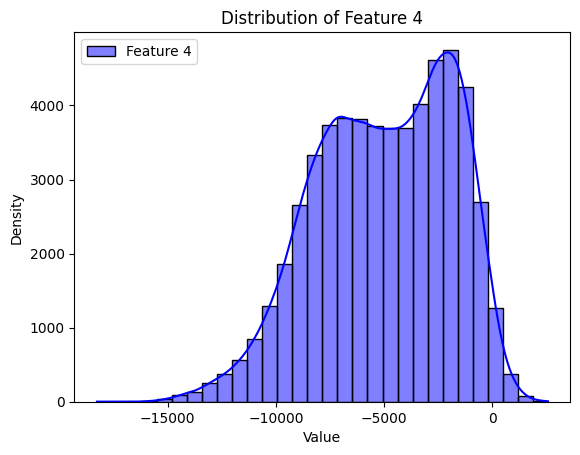

In [31]:
import seaborn as sns

num_features_to_plot = 5  # Plot first 5 features
for i in range(num_features_to_plot):
    sns.histplot(X_train[:, i], kde=True, bins=30, color='blue', label=f"Feature {i}")
    plt.title(f"Distribution of Feature {i}")
    plt.xlabel("Value")
    plt.ylabel("Density")
    plt.legend()
    plt.show()


# Model training using Random Forest

We take first 150 components to do the analysis

In [123]:
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier

# Apply PCA to reduce dimensionality
pca = PCA(n_components=150, svd_solver='randomized', whiten=True)
X_train_pca = pca.fit_transform(X_train)

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(
    n_estimators=100,  # Number of trees in the forest
    max_depth=None,     # Trees are grown until all leaves are pure
    random_state=42,    # For reproducibility
    n_jobs=-1,          # Use all available cores for parallel processing
)

# Perform cross-validation
cv_scores = cross_val_score(rf_classifier, X_train_pca, y_train, cv=5, scoring='accuracy')  # 5-fold cross-validation

# Print the cross-validation results
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation accuracy: {np.mean(cv_scores):.4f}")
print(f"Standard deviation of cross-validation accuracy: {np.std(cv_scores):.4f}")

Cross-validation scores: [0.85491071 0.86107143 0.85375    0.85892857 0.85553571]
Mean cross-validation accuracy: 0.8568
Standard deviation of cross-validation accuracy: 0.0027


# Model training using KNN

In [20]:


# Apply PCA to reduce dimensionality
pca = PCA(n_components=50, svd_solver='randomized', whiten=True)
X_train_pca = pca.fit_transform(X_train)

# Initialize KNN classifier
knn_classifier = KNeighborsClassifier(
    n_neighbors=5,  # Number of neighbors to use for classification
    weights='uniform',  # All neighbors have equal weight in prediction
)

# Perform cross-validation
cv_scores = cross_val_score(knn_classifier, X_train_pca, y_train, cv=5, scoring='accuracy')  # 5-fold cross-validation

# Print the cross-validation results
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation accuracy: {np.mean(cv_scores):.4f}")
print(f"Standard deviation of cross-validation accuracy: {np.std(cv_scores):.4f}")

Cross-validation scores: [0.85401786 0.859375   0.85080357 0.85776786 0.85473214]
Mean cross-validation accuracy: 0.8553
Standard deviation of cross-validation accuracy: 0.0030


# Model training using Logistic Regression

In [9]:

# Apply PCA to reduce dimensionality
pca = PCA(n_components=150, svd_solver='randomized', whiten=True)
X_train_pca = pca.fit_transform(X_train)

# Initialize Logistic Regression with softmax (multinomial)
log_reg_classifier = LogisticRegression(
    solver='lbfgs',        # The 'lbfgs' solver works well with multinomial loss
    multi_class='multinomial',  # Use softmax for multi-class classification
    max_iter=1000,         # Increase number of iterations for convergence
)

# Perform cross-validation
cv_scores = cross_val_score(log_reg_classifier, X_train_pca, y_train, cv=5, scoring='accuracy')  # 5-fold cross-validation

# Print the cross-validation results
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation accuracy: {np.mean(cv_scores):.4f}")
print(f"Standard deviation of cross-validation accuracy: {np.std(cv_scores):.4f}")

Cross-validation scores: [0.84883929 0.85232143 0.848125   0.84607143 0.84794643]
Mean cross-validation accuracy: 0.8487
Standard deviation of cross-validation accuracy: 0.0020


# Model training using SVM Classifier

Using Cross-Validation

In [8]:
# Apply PCA to reduce dimensionality
pca = PCA(n_components=150, svd_solver='randomized', whiten=True)
X_train_pca = pca.fit_transform(X_train)

# Initialize the SVM model
svm_classifier = SVC(
    kernel='rbf',
    C=13.0,       # Higher regularization for complex data
    gamma='auto',  # Lower gamma for broader influence of support vectors
)

# Perform cross-validation
cv_scores = cross_val_score(svm_classifier, X_train_pca, y_train, cv=5, scoring='accuracy')  # 5-fold cross-validation

# Print the cross-validation results
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation accuracy: {np.mean(cv_scores):.4f}")
print(f"Standard deviation of cross-validation accuracy: {np.std(cv_scores):.4f}")

Cross-validation scores: [0.89116071 0.89598214 0.89125    0.894375   0.89651786]
Mean cross-validation accuracy: 0.8939
Standard deviation of cross-validation accuracy: 0.0023


In [ ]:
# Test file

test_data = np.load('test.npz')
X_test = test_data['x_test'] 

scaler = StandardScaler()
X_test_scaled = scaler.fit_transform(X_test)

y_pred_test = svm_classifier.predict(X_test_scaled)

submission = pd.read_csv('sample_submission.csv')

submission['Label'] = y_pred_test


submission.to_csv('submission.csv', index=False)

print("Prediction completed and saved to 'submission.csv'.")

Using training data as 80% training 20% validation

In [8]:

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

# Apply PCA to reduce dimensionality
pca = PCA(n_components=150, svd_solver='randomized', whiten=True)  # Increased components to retain more variance
X_train_pca = pca.fit_transform(X_train)


# Split the training data for validation
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train_pca, y_train, test_size=0.2, random_state=42
)

# Train a Support Vector Machine (SVM) model
svm_classifier = SVC(
    kernel='rbf',
    C=10.0,        # Increased regularization for better fit
    gamma=0.01,   # Lower gamma for smoother decision boundary
    random_state=42
)

svm_classifier.fit(X_train_split, y_train_split)

# Evaluate the model on the validation set
y_pred_val = svm_classifier.predict(X_val_split)
val_accuracy = accuracy_score(y_val_split, y_pred_val)
print(f"Validation Accuracy: {val_accuracy:.4f}")



Validation Accuracy: 0.8931


In [4]:
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

# Apply PCA to reduce dimensionality
pca = PCA(n_components=150, svd_solver='randomized', whiten=True)  # Increased components to retain more variance
X_train_pca = pca.fit_transform(X_train)


# Split the training data for validation
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train_pca, y_train, test_size=0.2, random_state=42
)

# Train a Support Vector Machine (SVM) model
svm_classifier = SVC(
    kernel='rbf',
    C=13.0,        # Increased regularization for better fit
    gamma="auto",   # Lower gamma for smoother decision boundary
    random_state=42,
)

svm_classifier.fit(X_train_split, y_train_split)

# Evaluate the model on the validation set
y_pred_val = svm_classifier.predict(X_val_split)
val_accuracy = accuracy_score(y_val_split, y_pred_val)
print(f"Validation Accuracy: {val_accuracy:.4f}")



Validation Accuracy: 0.8976


Putting the label in sample_submission file

In [7]:

test_data = np.load('test.npz')
X_test = test_data['x_test'] 

scaler = StandardScaler()
X_test_scaled = scaler.fit_transform(X_test)

# Apply the trained PCA transformation to the test set
X_test_pca = pca.transform(X_test_scaled)

# Make predictions on the test set
y_pred_test = svm_classifier.predict(X_test_pca)



# Prepare the submission file
submission = pd.read_csv('sample_submission.csv')
submission['Label'] = y_pred_test  # Set predicted labels

# Save the predictions to a CSV file
submission.to_csv('submission.csv', index=False)

print("Prediction completed and saved to 'submission.csv'.")

Prediction completed and saved to 'submission.csv'.
